# Importing Libraries

In [46]:
import numpy as np
import pandas as pd
from scipy.stats import norm,shapiro
from scipy.optimize import least_squares
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from numpy.linalg import cond


# Reading Data

In [47]:
df = pd.read_csv("/content/data.csv")
X = df["t"]
y = df["y"]

# MODEL-1

Optimized Parameters:
  alpha0 = 0.0297
  alpha1 = 3.7714
  beta1  = 0.1073
  alpha2 = 4.5378
  beta2  = 1.5322
Estimated sigma^2: 0.003990725156596884
95% Confidence intervals for parameters:
Parameter0 -2696.1374978988006 2696.1969158529027
Parameter1 -2665.278317798304 2672.8210653621813
Parameter2 -83.9087658277707 84.12342934408302
Parameter3 -22.60546515293224 31.680992031101752
Parameter4 -0.757868229545869 3.8221880143980558


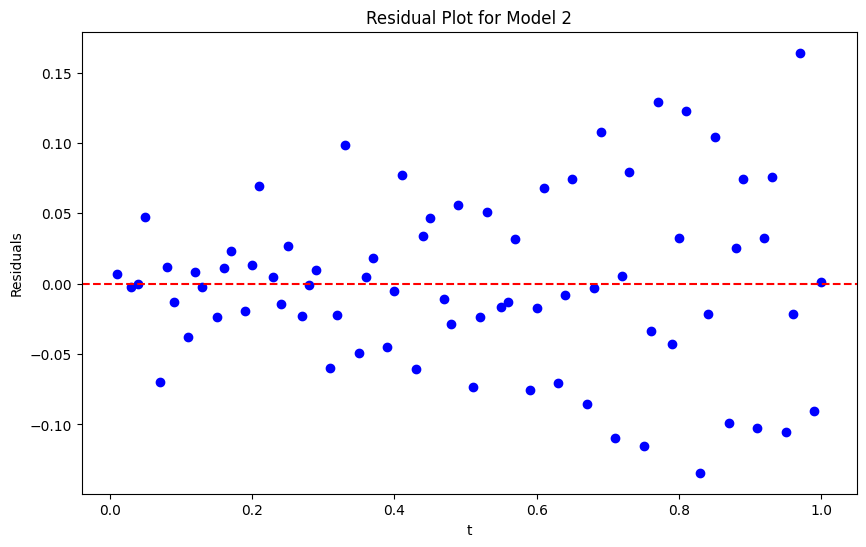

P Value:0.6023473857708722


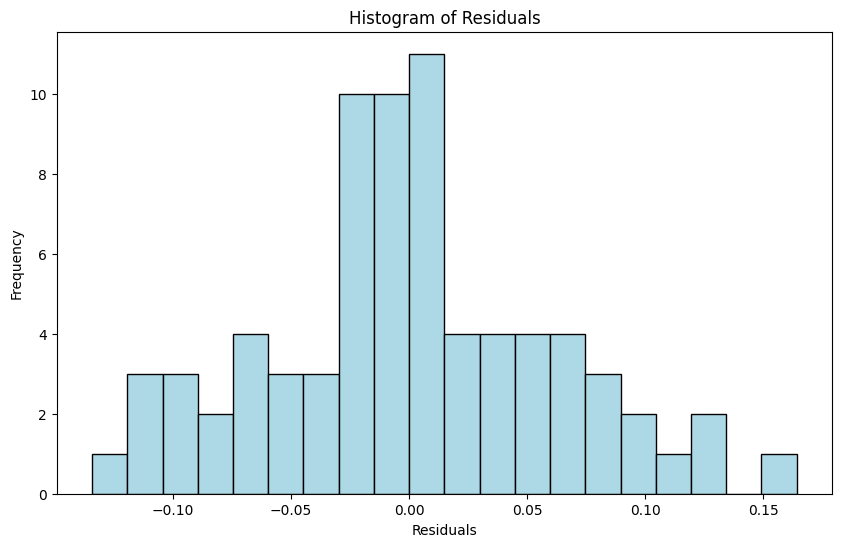

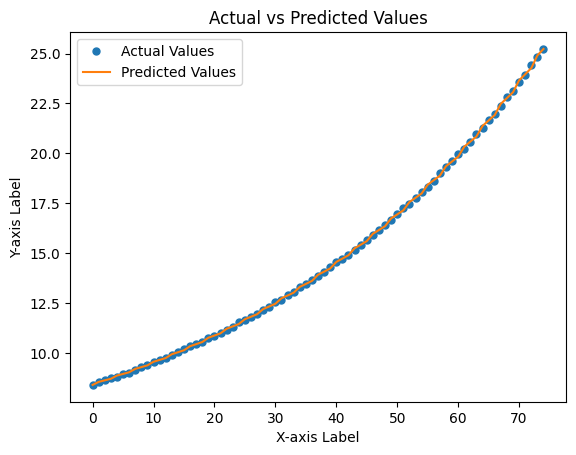

In [48]:
# Define the model function (same as before)
def model(t, alpha0, alpha1, beta1, alpha2, beta2):
    return alpha0 + alpha1 * np.exp(beta1 * t) + alpha2 * np.exp(beta2 * t)
# Define the residuals function (same as before)
def residuals(params, t, y):
    alpha0, alpha1, beta1, alpha2, beta2 = params
    return y - model(t, alpha0, alpha1, beta1, alpha2, beta2)
t_data = X
y_data = y
# Initial guess for parameters
initial_guess = [1.0, 1.0, -0.1, 1.0, -0.1]
#1.Calculating the LSE
result = least_squares(residuals, initial_guess, args=(t_data, y_data), method='lm')
alpha0_opt, alpha1_opt, beta1_opt, alpha2_opt, beta2_opt = result.x
print(f"Optimized Parameters:")
print(f"  alpha0 = {alpha0_opt:.4f}")
print(f"  alpha1 = {alpha1_opt:.4f}")
print(f"  beta1  = {beta1_opt:.4f}")
print(f"  alpha2 = {alpha2_opt:.4f}")
print(f"  beta2  = {beta2_opt:.4f}")
#4.Calculating variance
residuals_squared = residuals(result.x, t_data, y_data) ** 2
sigma2 = np.sum(residuals_squared) / (len(t_data) - len(result.x))
print(f"Estimated sigma^2: {sigma2}")
#5.Calculating Fischer Information Matrix for Confidence Interval
J = result.jac
cov_matrix = np.linalg.pinv(J.T @ J) * sigma2
param_std_devs = np.sqrt(np.diag(cov_matrix))
z_score = norm.ppf(0.975)
param_estimates = result.x
confidence_intervals = []
for i in range(len(param_estimates)):
    lower_bound = param_estimates[i] - z_score * param_std_devs[i]
    upper_bound = param_estimates[i] + z_score * param_std_devs[i]
    confidence_intervals.append((lower_bound, upper_bound))
print("95% Confidence intervals for parameters:")
for i, (lower, upper) in enumerate(confidence_intervals):
    print(f"Parameter{i}",lower,upper)
#6.Plot the residuals
y_pred = model(t_data, *result.x)
residuals_vals = residuals(result.x, t_data, y_data)
plt.figure(figsize=(10, 6))
plt.scatter(t_data, residuals_vals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("t")
plt.ylabel("Residuals")
plt.title("Residual Plot for Model 2")
plt.show()
#7. Normality of residuals
stat, p_value = stats.shapiro(residuals_vals)
print(f"P Value:{p_value}")
plt.figure(figsize=(10, 6))
plt.hist(residuals_vals, bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
#8.Final Plot
plt.plot(y, linestyle='None', marker='o', markersize=5, label='Actual Values')  # 'o' for circular markers
plt.plot(y_pred, label='Predicted Values')  # Solid line for predictions
plt.xlabel("X-axis Label")  # Add labels as needed
plt.ylabel("Y-axis Label")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

# MODEL-2

Estimated parameters: alpha_0 = 2.2439871727182106, alpha_1 = 1.2230552845142475, beta_0 = 0.2761898406248162, beta_1 = -0.1381856450196605
Estimated sigma^2: 0.014286476879889442
Condition number of the Jacobian matrix: 1.880117029113323e+17
95% Confidence intervals for parameters:
Parameter 0: (-1715.5703, 1720.0583)
Parameter 1: (-935.0489, 937.4950)
Parameter 2: (-105.4381, 105.9904)
Parameter 3: (-53.0300, 52.7537)


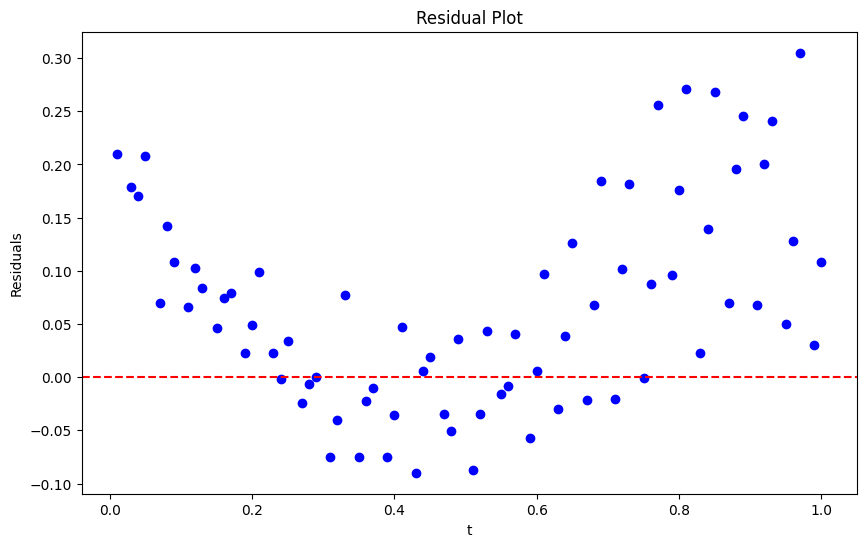

P Value: 0.017355097650197666
Residuals are not normally distributed.


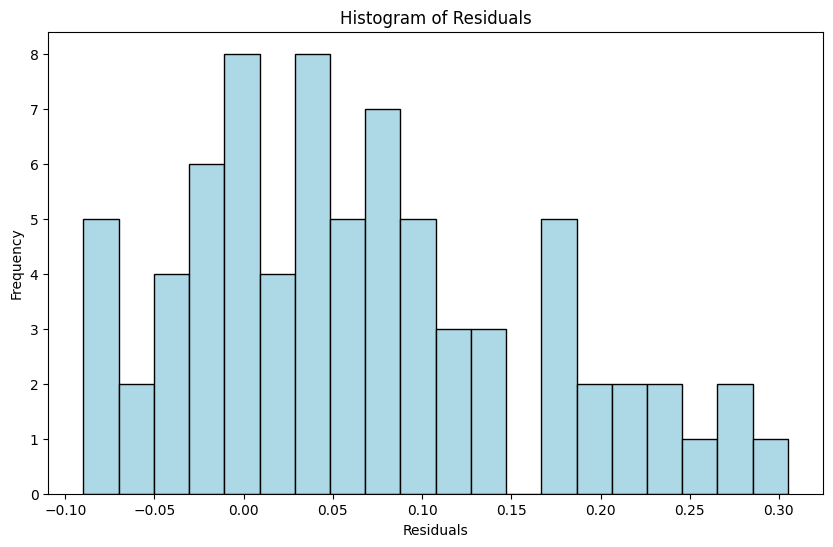

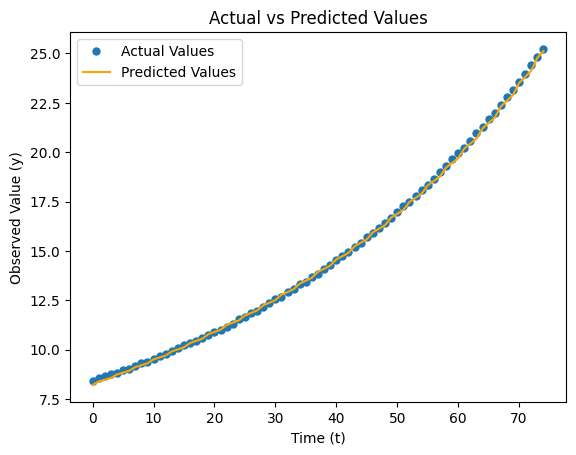

In [49]:
import numpy as np
from scipy.stats import norm,shapiro
t_data = np.array(X)
y_data = np.array(y)
#Initial Guesses
alpha_0, alpha_1, beta_0, beta_1 = 1.0, 1.0, 1.0, 1.0
#1.Calculating LSE's using Gradient Descent
learning_rate = 1e-6
max_iters = 100000
tolerance = 1e-6
# Objective function (residual sum of squares)
def residual_sum_of_squares(alpha_0, alpha_1, beta_0, beta_1):
    prediction = (alpha_0 + alpha_1 * t_data) / (beta_0 + beta_1 * t_data)
    residuals = y_data - prediction
    return np.sum(residuals ** 2)
# Gradient calculation
def gradient(alpha_0, alpha_1, beta_0, beta_1):
    prediction = (alpha_0 + alpha_1 * t_data) / (beta_0 + beta_1 * t_data)
    residuals = y_data - prediction
    # Compute gradients
    grad_alpha_0 = -2 * np.sum(residuals / (beta_0 + beta_1 * t_data))
    grad_alpha_1 = -2 * np.sum(residuals * t_data / (beta_0 + beta_1 * t_data))
    grad_beta_0 = 2 * np.sum(residuals * prediction / (beta_0 + beta_1 * t_data))
    grad_beta_1 = 2 * np.sum(residuals * prediction * t_data / (beta_0 + beta_1 * t_data))
    return np.array([grad_alpha_0, grad_alpha_1, grad_beta_0, grad_beta_1])
# Gradient descent loop
for iteration in range(max_iters):
    # Calculate gradient
    grad = gradient(alpha_0, alpha_1, beta_0, beta_1)
    # Update parameters
    alpha_0 -= learning_rate * grad[0]
    alpha_1 -= learning_rate * grad[1]
    beta_0 -= learning_rate * grad[2]
    beta_1 -= learning_rate * grad[3]
    # Check for convergence
print(f"Estimated parameters: alpha_0 = {alpha_0}, alpha_1 = {alpha_1}, beta_0 = {beta_0}, beta_1 = {beta_1}")
prediction = (alpha_0 + alpha_1 * t_data) / (beta_0 + beta_1 * t_data)
residuals = y_data - prediction
residuals_squared = residuals ** 2
sigma2 = np.sum(residuals_squared) / (len(t_data) - 4)  # degrees of freedom: 4 parameters estimated
print(f"Estimated sigma^2: {sigma2}")
#4.Calculating Confidence Interval using Fischer Information Matrix
def jacobian(alpha_0, alpha_1, beta_0, beta_1):
    prediction = (alpha_0 + alpha_1 * t_data) / (beta_0 + beta_1 * t_data)
    residuals = y_data - prediction
    J = np.zeros((len(t_data), 4))  # Jacobian matrix for each parameter
    J[:, 0] = -residuals / (beta_0 + beta_1 * t_data)
    J[:, 1] = -residuals * t_data / (beta_0 + beta_1 * t_data)
    J[:, 2] = 2 * residuals * prediction / (beta_0 + beta_1 * t_data)
    J[:, 3] = 2 * residuals * prediction * t_data / (beta_0 + beta_1 * t_data)
    return J
J=jacobian(alpha_0, alpha_1, beta_0, beta_1)
J_condition_number = np.linalg.cond(J)
print(f"Condition number of the Jacobian matrix: {J_condition_number}")
# Fisher Information Matrix (FIM) calculation
FIM = np.dot(J.T, J) / sigma2
regularization_term = 1e-6 * np.eye(FIM.shape[0])
FIM_regularized = FIM + regularization_term
cov_matrix = np.linalg.inv(FIM_regularized)
param_std_devs = np.sqrt(np.diag(cov_matrix))
params = np.array([alpha_0, alpha_1, beta_0, beta_1])
if np.any(np.isnan(param_std_devs)):
    print("Error: Standard deviations contain NaN values, indicating numerical instability.")
else:
    z_score = norm.ppf(0.975)
    confidence_intervals = [
        (param - z_score * std, param + z_score * std)
        for param, std in zip(params, param_std_devs)
    ]

    print("95% Confidence intervals for parameters:")
    for i, (lower, upper) in enumerate(confidence_intervals):
        print(f"Parameter {i}: ({lower:.4f}, {upper:.4f})")
# 6. Plot the Residuals
plt.figure(figsize=(10, 6))
plt.scatter(t_data, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("t")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
# 7. Plot Histogram of Residuals
stat, p_value = shapiro(residuals)
print(f"P Value: {p_value}")
if p_value < 0.05:
    print("Residuals are not normally distributed.")
else:
    print("Residuals are normally distributed.")
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
# 8. Final Plot of Actual vs Predicted Values
plt.plot(y_data, linestyle='None', marker='o', markersize=5, label='Actual Values')
plt.plot(prediction, label='Predicted Values', color='orange')
plt.xlabel("Time (t)")
plt.ylabel("Observed Value (y)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

# MODEL-3

[8.33417074 7.40905432 5.3293839  2.22031239 1.93072417]
Estimate of variance (sigma^2): 0.0039815481968951405
Coefficients, Standard Errors and 95% Confidence Intervals:
Coefficient 0: 8.3342
Standard Error 0: 0.0393
95% Confidence Interval 0: (8.2572, 8.4112)

Coefficient 1: 7.4091
Standard Error 1: 0.5293
95% Confidence Interval 1: (6.3716, 8.4465)

Coefficient 2: 5.3294
Standard Error 2: 2.1051
95% Confidence Interval 2: (1.2034, 9.4554)

Coefficient 3: 2.2203
Standard Error 3: 3.1124
95% Confidence Interval 3: (-3.8799, 8.3206)

Coefficient 4: 1.9307
Standard Error 4: 1.5242
95% Confidence Interval 4: (-1.0567, 4.9181)



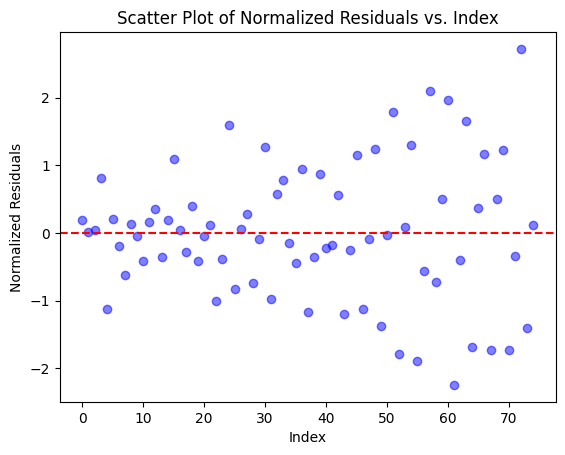

P Value:0.6590773077653632


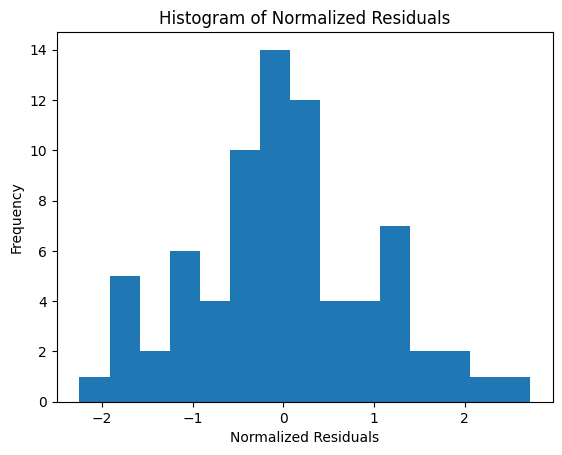

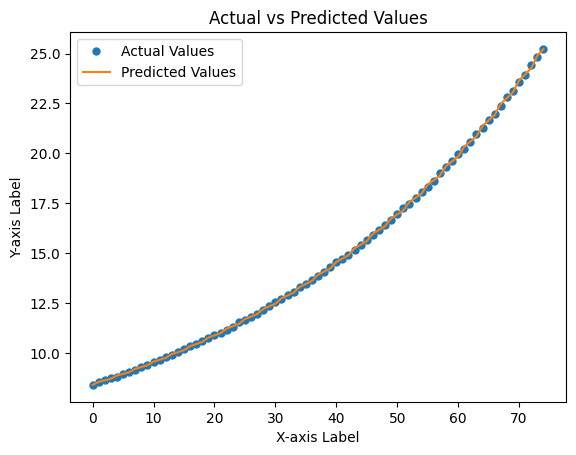

In [50]:
X_matrix = np.column_stack((np.ones(len(X)), X, X**2, X**3, X**4))
#1.Calculating the LSE's
B_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y
print(B_hat)
y_pred = X_matrix @ B_hat
#4 Calculating Variance
residuals = y - y_pred
n = len(y)
p = X_matrix.shape[1]
sigma2_hat = (residuals.T @ residuals) / (n - p)
print(f"Estimate of variance (sigma^2): {sigma2_hat}")
# 5.Calculating Confidence Interval using Fischer Information Matrix
mse = 0
for i in range(len(y)):
    mse+= (y_pred[i] - y[i])**2
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
fisher_info = (1 / sigma2_hat) * (X_matrix.T @ X_matrix)
covariance_matrix = np.linalg.inv(fisher_info)
std_errors = np.sqrt(np.diag(covariance_matrix))
t_critical = 1.96
lower_bounds = B_hat - t_critical * std_errors
upper_bounds = B_hat + t_critical * std_errors
print("Coefficients, Standard Errors and 95% Confidence Intervals:")
for i in range(len(B_hat)):
    print(f"Coefficient {i}: {B_hat[i]:.4f}")
    print(f"Standard Error {i}: {std_errors[i]:.4f}")
    print(f"95% Confidence Interval {i}: ({lower_bounds[i]:.4f}, {upper_bounds[i]:.4f})\n")
#6.Residuals Plot
normalized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.scatter(range(len(normalized_residuals)), normalized_residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Index")
plt.ylabel("Normalized Residuals")
plt.title("Scatter Plot of Normalized Residuals vs. Index")
plt.show()
#7.Normality Assumptions Check
stat, p_value = stats.shapiro(residuals)
print(f"P Value:{p_value}")
plt.hist(normalized_residuals, bins=15)  # Adjust the number of bins as needed
plt.xlabel("Normalized Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Normalized Residuals")
plt.show()
#8.Final Plot of predicted values vs actual values
plt.plot(y, linestyle='None', marker='o', markersize=5, label='Actual Values')  # 'o' for circular markers
plt.plot(y_pred, label='Predicted Values')  # Solid line for predictions
plt.xlabel("X-axis Label")  # Add labels as needed
plt.ylabel("Y-axis Label")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()